# Giving names to nodes

In [1]:
%matplotlib inline
import numpy as np
from scipy import sparse
import scipy.sparse.linalg
from matplotlib import pyplot as plt
from pyunlocbox import functions, solvers
import pygsp as pg

# import our own functions
from our_functions import get_true_labels, find_components, find_largest_component, give_names_tonodes_dates_based, num_nodes
import random

In [2]:
A = np.load('adjacency.npy')

# get the largest component
A, size = find_largest_component(find_components(A))

n_nodes = size
n_edges = np.count_nonzero(A) / 2

# get terrorist names for each node
names, A, name_dict = give_names_tonodes_dates_based(A)

# get relation label for each node
labels = get_true_labels(A)

# Graph Inversion

Number of unique terrorist: 244


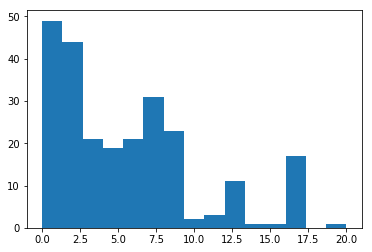

In [3]:
# Number of unique terrorists
num_terrorist = len(name_dict.keys())
print("Number of unique terrorist: {n:}".format(n=num_terrorist))

# Array of terrorist names 
all_names = np.array(list(name_dict.keys()))

# Initialize inverted adjacency matrix. Symmetric and unweighted by default.
A_inverted = np.zeros((num_terrorist, num_terrorist))
A_relations = np.zeros((num_terrorist, num_terrorist))

counter = set()
for n in range(n_nodes):
    temp = []
    for d in range(num_terrorist):
        if n in list(name_dict.values())[d]:
            # collect all terrorist names that correspond to node n
            temp.append(list(name_dict.keys())[d])
            counter.update(set(list(name_dict.values())[d]))

    for k in range(len(temp)):
        for j in range(len(temp)):
            if k >= j: continue
            idx = np.where(np.array(list(name_dict.keys()))==temp[k])[0][0]
            idx2 = np.where(np.array(list(name_dict.keys()))==temp[j])[0][0]
            
            # create an edge between all terrorists that belonged to the same node in original graph
            A_inverted[idx,idx2] = 1
            A_inverted[idx2,idx] = 1
            
            # create a matrix which stores corresponding relations between terrorists             
            A_relations[idx,idx2] = int(labels[n])
            A_relations[idx2,idx] = int(labels[n])
            
plt.hist(np.sum(A_inverted,axis=1), bins=15)
plt.show()

Number of disconnected components: 30


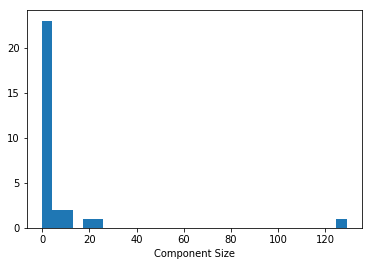

Size of original inverted graph: 244


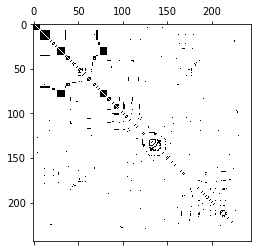

Size of largest component: 129


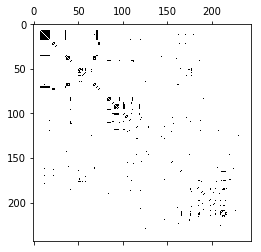

In [4]:
components = find_components(A_inverted)
largest_component_inv, size = find_largest_component(components)
print("Number of disconnected components: {d:}".format(d=len(components)))
deg_dist = []
for c in range(len(components)):
    deg_dist.append(num_nodes(components[c]))
plt.hist(deg_dist, bins=len(components))
plt.xlabel('Component Size')
plt.show()

print("Size of original inverted graph: {s:}".format(s=num_terrorist))
plt.spy(A_inverted)
plt.show()

print("Size of largest component: {s:}".format(s=size))
plt.spy(largest_component_inv)
plt.show()



In [5]:
for idx, name in enumerate(names):
    print(name)
    for i in range(A.shape[0]):
        if A[idx, i] == 1:
            print("\t"+str(names[i]))

['UmarBaziyani;Saif_Aldin_Mustafa_Nuaimi; node:0']
	['Muhammad_Daham_Abu_Hamadi;Saif_Aldin_Mustafa_Nuaimi; node:1']
	['Abu_Karrar;Saif_Aldin_Mustafa_Nuaimi; node:2']
	['Abu_Jalal_Iraqi;Saif_Aldin_Mustafa_Nuaimi; node:3']
	['UmarBaziyani;Muhammad_Daham_Abu_Hamadi; node:19']
	['UmarBaziyani;Abdul_Qadir_Ashur_Jaburi; node:20']
	['Zarqawi;Saif_Aldin_Mustafa_Nuaimi; node:425']
	['Abu_Obaida_Kubaisi;Saif_Aldin_Mustafa_Nuaimi; node:426']
	['Abdul_Qadir_Ashur_Jaburi;Saif_Aldin_Mustafa_Nuaimi; node:427']
	['UmarBaziyani;Abu_Obaida_Kubaisi; node:428']
	['UmarBaziyani;Zarqawi; node:432']
	['UmarBaziyani;Abu_Karrar; node:441']
	['UmarBaziyani;Abu_Jalal_Iraqi; node:443']
['Muhammad_Daham_Abu_Hamadi;Saif_Aldin_Mustafa_Nuaimi; node:1']
	['UmarBaziyani;Saif_Aldin_Mustafa_Nuaimi; node:0']
	['Abu_Karrar;Saif_Aldin_Mustafa_Nuaimi; node:2']
	['Abu_Jalal_Iraqi;Saif_Aldin_Mustafa_Nuaimi; node:3']
	['Muhammad_Daham_Abu_Hamadi;Zarqawi; node:7']
	['Muhammad_Daham_Abu_Hamadi;Abu_Karrar; node:16']
	['Muhammad_Da

	['SheikhYassin;Abu_Marzuq; node:486']
	['SheikhYassin;AbbasSayyed; node:514']
	['/2005/09/08/05:06:43;SheikhYassin; node:516']
	['/2005/09/08/04:57:12;SheikhYassin; node:517']
	['/2005/09/08/04:57:45;SheikhYassin; node:518']
	['/2005/09/08/05:05:14;SheikhYassin; node:519']
['/2005/10/20/19:57:58;Yasser_Arafat; node:41']
	['SheikhYassin;Yasser_Arafat; node:40']
	['Khaled_al-Fahoum;Yasser_Arafat; node:42']
	['/2005/08/09/18:19:04;Yasser_Arafat; node:43']
	['/2005/10/20/19:57:58;Khaled_al-Fahoum; node:72']
	['/2005/10/20/19:46:14;/2005/10/20/19:57:58; node:185']
	['Yasser_Arafat;/2005/12/19/21:14:22; node:259']
	['/2005/10/20/19:57:58;/2005/09/08/04:39:17; node:323']
	['/2005/10/20/19:46:14;Yasser_Arafat; node:467']
	['/2005/08/02/16:08:22;Yasser_Arafat; node:468']
	['FarouqQaddoumi;Yasser_Arafat; node:469']
	['/2005/09/08/04:39:17;Yasser_Arafat; node:470']
	['/2005/10/20/19:57:58;FarouqQaddoumi; node:501']
	['/2005/10/20/19:57:58;/2005/08/09/18:19:04; node:522']
	['/2005/08/02/16:08:22;

	['/2005/09/08/05:04:10;/2005/09/08/05:06:43; node:220']
	['MohammedSchreim;AbbasSayyed; node:331']
	['NasserWatimi;AbbasSayyed; node:332']
	['AbbasSayyed;/2005/09/08/04:55:32; node:437']
	['/2005/09/08/05:06:43;KhaledMashal; node:447']
	['AbbasSayyed;MohammedTaher; node:508']
	['/2005/09/08/04:56:27;AbbasSayyed; node:512']
	['/2005/09/13/19:54:36;AbbasSayyed; node:513']
	['SheikhYassin;AbbasSayyed; node:514']
	['/2005/09/08/05:05:14;AbbasSayyed; node:515']
	['/2005/09/08/05:06:43;SheikhYassin; node:516']
	['/2005/09/08/05:06:43;/2005/09/08/04:57:45; node:565']
	['/2005/09/13/19:54:36;/2005/09/08/05:06:43; node:644']
	['BassetOdeh;AbbasSayyed; node:755']
	['FathiKhatib;AbbasSayyed; node:756']
	['MuammarSheikh;AbbasSayyed; node:757']
['/2005/09/08/04:57:12;AbbasSayyed; node:83']
	['/2005/09/08/04:57:12;KhaledMashal; node:22']
	['AbbasSayyed;KhaledMashal; node:23']
	['/2005/09/08/04:57:12;Abu_Marzuq; node:57']
	['AbbasSayyed;Abu_Marzuq; node:58']
	['/2005/09/08/04:57:12;MohammedTaher; no

	['Jason_Walters;Racid_Belkacem; node:639']
	['Jason_Walters;Abdelhamid_Bouchema; node:652']
['Ahmed_Said_Khadr;Wadih_el-Hage; node:111']
	['Shubhi_Mohammed_abu_Sittah;Wadih_el-Hage; node:112']
	['Mustafa_Ahmed_al-Hawsawi;Wadih_el-Hage; node:113']
	['Ahmed_Said_Khadr;Zain_al-Abidin_Mohd_Hussein; node:186']
	['Osama_Rushdi;Ahmed_Said_Khadr; node:225']
	['/2006/01/12/21:00:18;Wadih_el-Hage; node:346']
	['Zain_al-Abidin_Mohd_Hussein;Wadih_el-Hage; node:540']
	['Mamdouh_Mahmud_Salim;Wadih_el-Hage; node:541']
	['Osama_Rushdi;Wadih_el-Hage; node:542']
	['Ahmed_Said_Khadr;Shubhi_Mohammed_abu_Sittah; node:557']
	['Mamdouh_Mahmud_Salim;Ahmed_Said_Khadr; node:649']
	['Mustafa_Ahmed_al-Hawsawi;Ahmed_Said_Khadr; node:650']
['Shubhi_Mohammed_abu_Sittah;Wadih_el-Hage; node:112']
	['Ahmed_Said_Khadr;Wadih_el-Hage; node:111']
	['Mustafa_Ahmed_al-Hawsawi;Wadih_el-Hage; node:113']
	['Zain_al-Abidin_Mohd_Hussein;Shubhi_Mohammed_abu_Sittah; node:129']
	['Mamdouh_Mahmud_Salim;Shubhi_Mohammed_abu_Sittah; no

	['Abdelhamid_Bouchema;Ismael_Akhnikh; node:573']
	['Nadir_Adarraf;Yousef_Ettoumi; node:619']
	['Nadir_Adarraf;Nouredine_el_Fahtni; node:627']
	['Abdelhamid_Bouchema;Nadir_Adarraf; node:648']
['Racid_Belkacem;Ismael_Akhnikh; node:143']
	['Ismael_Akhnikh;Abu_Khaled; node:36']
	['Racid_Belkacem;Zine_Labidine_Aourghe; node:98']
	['Ismael_Akhnikh;Jermaine_Walters; node:107']
	['Racid_Belkacem;Rashid_Boussana; node:125']
	['Ismael_Akhnikh;Zakaria_Taybi; node:134']
	['Mohamed_el_Bousklaoui;Ismael_Akhnikh; node:141']
	['Nadir_Adarraf;Ismael_Akhnikh; node:142']
	['Mohammed_Fahmi_Boughabe;Ismael_Akhnikh; node:144']
	['Samir_Azzouz;Ismael_Akhnikh; node:145']
	['Jason_Walters;Ismael_Akhnikh; node:146']
	['Racid_Belkacem;Samir_Azzouz; node:156']
	['Racid_Belkacem;Mohammad_Bouyeri; node:172']
	['Racid_Belkacem;Mohamed_el_Morabit; node:179']
	['Racid_Belkacem;Yousef_Ettoumi; node:195']
	['Racid_Belkacem;Nouredine_el_Fahtni; node:203']
	['Nadir_Adarraf;Racid_Belkacem; node:213']
	['Abdelhamid_Bouchem

	['Abdelhamid_Bouchema;Mohamed_el_Morabit; node:180']
	['Nadir_Adarraf;Mohamed_el_Bousklaoui; node:200']
	['Nadir_Adarraf;Racid_Belkacem; node:213']
	['Mohammed_Fahmi_Boughabe;Nadir_Adarraf; node:223']
	['Jason_Walters;Nadir_Adarraf; node:224']
	['Nadir_Adarraf;Zine_Labidine_Aourghe; node:524']
	['Nadir_Adarraf;Jermaine_Walters; node:533']
	['Mohamed_el_Morabit;Jermaine_Walters; node:536']
	['Nadir_Adarraf;Rashid_Boussana; node:551']
	['Nadir_Adarraf;Zakaria_Taybi; node:560']
	['Mohamed_el_Morabit;Zakaria_Taybi; node:562']
	['Mohamed_el_Morabit;Ismael_Akhnikh; node:571']
	['Mohamed_el_Morabit;Samir_Azzouz; node:584']
	['Mohamed_el_Morabit;Mohammad_Bouyeri; node:597']
	['Nouredine_el_Fahtni;Mohamed_el_Morabit; node:602']
	['Yousef_Ettoumi;Mohamed_el_Morabit; node:603']
	['Mohammed_Fahmi_Boughabe;Mohamed_el_Morabit; node:604']
	['Jason_Walters;Mohamed_el_Morabit; node:605']
	['Nadir_Adarraf;Yousef_Ettoumi; node:619']
	['Nadir_Adarraf;Nouredine_el_Fahtni; node:627']
	['Abdelhamid_Bouchema

	['Jason_Walters;Abdelhamid_Bouchema; node:652']
['Osama_Rushdi;Ahmed_Said_Khadr; node:225']
	['Ahmed_Said_Khadr;Wadih_el-Hage; node:111']
	['Ahmed_Said_Khadr;Zain_al-Abidin_Mohd_Hussein; node:186']
	['Osama_Rushdi;Zain_al-Abidin_Mohd_Hussein; node:187']
	['Osama_Rushdi;Wadih_el-Hage; node:542']
	['Ahmed_Said_Khadr;Shubhi_Mohammed_abu_Sittah; node:557']
	['Osama_Rushdi;Shubhi_Mohammed_abu_Sittah; node:558']
	['Mamdouh_Mahmud_Salim;Ahmed_Said_Khadr; node:649']
	['Mustafa_Ahmed_al-Hawsawi;Ahmed_Said_Khadr; node:650']
	['Osama_Rushdi;Mustafa_Ahmed_al-Hawsawi; node:653']
	['Mamdouh_Mahmud_Salim;Osama_Rushdi; node:654']
['/2005/09/13/19:54:36;/2005/09/08/04:56:27; node:226']
	['/2005/09/08/04:56:27;KhaledMashal; node:21']
	['/2005/09/13/19:54:36;MohammedTaher; node:79']
	['/2005/09/08/04:56:27;SheikhYassin; node:87']
	['/2005/09/13/19:54:36;SheikhYassin; node:88']
	['/2005/09/08/04:56:27;/2005/09/08/04:57:45; node:138']
	['/2005/09/13/19:54:36;/2005/09/08/04:57:45; node:139']
	['/2005/09/13

	['EyadIsmoil;/2005/09/08/04:21:16; node:341']
	['MohammedSalameh;/2005/09/08/04:21:16; node:342']
	['/2005/09/08/04:21:16;/2005/09/08/03:44:31; node:458']
	['/2005/09/09/16:35:29;/2005/09/08/04:21:16; node:543']
	['AhmadAjaj;MahmudAbouhalima; node:647']
	['/2005/09/08/04:21:16;Nidal_Ayyad; node:723']
	['/2005/09/08/04:21:16;Rahman; node:732']
	['EyadIsmoil;AhmadAjaj; node:762']
	['Mahmud_Abouhalima;AhmadAjaj; node:763']
	['Mahmud_Abouhalima;/2005/09/08/04:21:16; node:766']
['Zain_al-Abidin_Mohd_Hussein;Djamel_Beghal; node:340']
	['Zain_al-Abidin_Mohd_Hussein;/2005/11/01/01:52:41; node:44']
	['Zain_al-Abidin_Mohd_Hussein;Shubhi_Mohammed_abu_Sittah; node:129']
	['Ahmed_Said_Khadr;Zain_al-Abidin_Mohd_Hussein; node:186']
	['Osama_Rushdi;Zain_al-Abidin_Mohd_Hussein; node:187']
	['/2005/10/31/18:01:07;Zain_al-Abidin_Mohd_Hussein; node:188']
	['AhmedRessam;Zain_al-Abidin_Mohd_Hussein; node:349']
	['Djamel_Beghal;Yacine_Akhnouche; node:389']
	['Djamel_Beghal;/2006/01/18/11:45:29; node:395']
	

	['/2005/08/23/02:24:06;abu_Faraj_al-Libbi; node:531']
	['/2005/08/23/02:24:06;/2005/11/01/19:40:15; node:574']
	['/2005/09/29/17:35:10;/2005/08/23/02:24:06; node:622']
	['/2005/08/23/17:24:29;/2005/09/08/04:39:17; node:749']
['/2005/08/12/18:07:08;/2005/11/04/20:40:21; node:364']
	['/2005/08/12/18:07:08;/2005/08/12/18:07:40; node:352']
	['/2005/11/04/20:40:21;/2005/08/12/18:07:40; node:353']
	['/2005/11/04/20:40:21;Jamal_Zougam; node:355']
	['/2005/08/12/17:55:04;/2005/11/04/20:40:21; node:365']
	['/2005/08/12/18:07:08;/2005/08/12/18:06:12; node:366']
	['/2005/08/12/18:07:08;/2005/08/12/17:55:04; node:367']
	['/2005/08/12/18:07:08;/2005/08/12/18:08:51; node:737']
	['/2005/11/04/20:40:21;/2005/08/12/18:08:51; node:738']
	['/2005/08/12/18:07:08;Abu_Khaled; node:750']
	['/2005/11/04/20:40:21;Abu_Khaled; node:751']
	['Omar_Mahmoud_Othman;/2005/11/04/20:40:21; node:788']
	['/2005/08/12/18:06:12;/2005/11/04/20:40:21; node:789']
['/2005/08/12/17:55:04;/2005/11/04/20:40:21; node:365']
	['/200

	['Djamel_Beghal;Richard_Colvin_Reid; node:845']
['Germaine_Lindsay;Habib_Zacarias_Moussaoui; node:397']
	['Hasib_Mir_Hussain;Germaine_Lindsay; node:362']
	['Germaine_Lindsay;Mustafa_Kamel; node:372']
	['Habib_Zacarias_Moussaoui;Mustafa_Kamel; node:376']
	['Habib_Zacarias_Moussaoui;Mohammad_Sidique_Khan; node:382']
	['Germaine_Lindsay;Yacine_Akhnouche; node:385']
	['Amar_Makhulif;Habib_Zacarias_Moussaoui; node:398']
	['/2005/08/09/16:43:04;Habib_Zacarias_Moussaoui; node:399']
	['Djamel_Beghal;Habib_Zacarias_Moussaoui; node:400']
	['Richard_Colvin_Reid;Habib_Zacarias_Moussaoui; node:401']
	['Germaine_Lindsay;/2005/08/09/16:43:04; node:408']
	['Germaine_Lindsay;/2005/11/18/20:07:34; node:414']
	['/2005/08/09/16:36:24;Germaine_Lindsay; node:422']
	['/2006/01/18/11:51:40;Germaine_Lindsay; node:423']
	['Shehzad_Tanweer;Germaine_Lindsay; node:786']
	['Habib_Zacarias_Moussaoui;Yacine_Akhnouche; node:814']
	['Germaine_Lindsay;/2006/01/18/11:45:29; node:817']
	['Habib_Zacarias_Moussaoui;/2006/0

	['Zarqawi;/2005/09/08/04:55:32; node:724']
	['Omar_Mahmoud_Othman;Zarqawi; node:726']
['Abu_Obaida_Kubaisi;Saif_Aldin_Mustafa_Nuaimi; node:426']
	['UmarBaziyani;Saif_Aldin_Mustafa_Nuaimi; node:0']
	['Muhammad_Daham_Abu_Hamadi;Saif_Aldin_Mustafa_Nuaimi; node:1']
	['Abu_Karrar;Saif_Aldin_Mustafa_Nuaimi; node:2']
	['Abu_Jalal_Iraqi;Saif_Aldin_Mustafa_Nuaimi; node:3']
	['Zarqawi;Abu_Obaida_Kubaisi; node:4']
	['Abu_Karrar;Abu_Obaida_Kubaisi; node:5']
	['Abu_Jalal_Iraqi;Abu_Obaida_Kubaisi; node:6']
	['Zarqawi;Saif_Aldin_Mustafa_Nuaimi; node:425']
	['Abdul_Qadir_Ashur_Jaburi;Saif_Aldin_Mustafa_Nuaimi; node:427']
	['UmarBaziyani;Abu_Obaida_Kubaisi; node:428']
	['Muhammad_Daham_Abu_Hamadi;Abu_Obaida_Kubaisi; node:429']
	['Abdul_Qadir_Ashur_Jaburi;Abu_Obaida_Kubaisi; node:430']
['Abdul_Qadir_Ashur_Jaburi;Saif_Aldin_Mustafa_Nuaimi; node:427']
	['UmarBaziyani;Saif_Aldin_Mustafa_Nuaimi; node:0']
	['Muhammad_Daham_Abu_Hamadi;Saif_Aldin_Mustafa_Nuaimi; node:1']
	['Abu_Karrar;Saif_Aldin_Mustafa_Nuaim

	['Nayef_Hawetmeh;KhaledMashal; node:753']
['/2005/09/08/05:05:14;KhaledMashal; node:452']
	['KhaledMashal;/2005/09/08/04:55:32; node:12']
	['/2005/09/08/04:56:27;KhaledMashal; node:21']
	['/2005/09/08/04:57:12;KhaledMashal; node:22']
	['AbbasSayyed;KhaledMashal; node:23']
	['/2005/09/08/04:57:45;KhaledMashal; node:24']
	['Yehya_Ayyash;KhaledMashal; node:25']
	['/2005/09/08/05:04:10;KhaledMashal; node:26']
	['/2005/09/08/05:05:14;MohammedTaher; node:81']
	['/2005/09/08/05:05:14;/2005/09/08/04:57:45; node:140']
	['/2005/09/08/05:05:14;/2005/09/08/04:57:12; node:152']
	['/2005/09/08/05:06:43;/2005/09/08/05:05:14; node:205']
	['/2005/09/13/19:54:36;/2005/09/08/05:05:14; node:206']
	['KhaledMashal;FarouqQaddoumi; node:305']
	['KhaledMashal;RamadanShallah; node:309']
	['/2006/01/30/17:40:04;KhaledMashal; node:328']
	['Mohtashemi-Pour;KhaledMashal; node:329']
	['/2005/09/08/05:05:14;/2005/09/08/04:55:32; node:440']
	['/2005/09/08/05:06:43;KhaledMashal; node:447']
	['Abu_Marzuq;KhaledMashal; 

	['abu_Faraj_al-Libbi;KSM; node:64']
	['/2005/11/01/19:40:15;abu_Faraj_al-Libbi; node:102']
	['/2005/09/29/17:35:10;abu_Faraj_al-Libbi; node:103']
	['OBL;/2005/10/31/19:29:13; node:317']
	['Amar_Makhulif;OBL; node:321']
	['/2005/09/08/04:39:17;OBL; node:322']
	['KSM;OBL; node:476']
	['/2005/08/23/02:24:06;OBL; node:477']
	['/2005/08/23/02:24:06;abu_Faraj_al-Libbi; node:531']
	['OBL;/2006/03/27/19:28:29; node:741']
	['Rifai_Ahmed_Taha;OBL; node:745']
	['/2005/08/12/20:49:04;OBL; node:746']
['/2006/02/01/17:03:50;Zawahiri; node:479']
	['/2006/02/14/16:53:51;Zawahiri; node:53']
	['/2005/11/01/19:40:15;Zawahiri; node:54']
	['abu_Faraj_al-Libbi;Zawahiri; node:55']
	['/2006/02/01/17:03:50;/2006/02/14/16:53:51; node:69']
	['/2006/02/01/17:03:50;/2006/02/02/03:30:00; node:233']
	['Zawahiri;Rahman; node:308']
	['Rifai_Ahmed_Taha;Zawahiri; node:319']
	['Abdel_Qader_Mahmoud_Es_Sayed;Zawahiri; node:320']
	['KSM;Zawahiri; node:480']
	['/2005/08/23/02:24:06;Zawahiri; node:481']
	['/2005/09/29/17:35:

['/2005/09/08/05:05:14;SheikhYassin; node:519']
	['SheikhYassin;Yasser_Arafat; node:40']
	['SheikhYassin;MohammedTaher; node:80']
	['/2005/09/08/05:05:14;MohammedTaher; node:81']
	['/2005/09/08/04:56:27;SheikhYassin; node:87']
	['/2005/09/13/19:54:36;SheikhYassin; node:88']
	['Yehya_Ayyash;SheikhYassin; node:89']
	['/2005/09/08/05:04:10;SheikhYassin; node:90']
	['/2005/09/08/05:05:14;/2005/09/08/04:57:45; node:140']
	['/2005/09/08/05:05:14;/2005/09/08/04:57:12; node:152']
	['/2005/09/08/05:06:43;/2005/09/08/05:05:14; node:205']
	['/2005/09/13/19:54:36;/2005/09/08/05:05:14; node:206']
	['SheikhYassin;/2005/09/08/04:55:32; node:439']
	['/2005/09/08/05:05:14;/2005/09/08/04:55:32; node:440']
	['SheikhYassin;KhaledMashal; node:451']
	['/2005/09/08/05:05:14;KhaledMashal; node:452']
	['SheikhYassin;Abu_Marzuq; node:486']
	['/2005/09/08/05:05:14;Abu_Marzuq; node:487']
	['SheikhYassin;AbbasSayyed; node:514']
	['/2005/09/08/05:05:14;AbbasSayyed; node:515']
	['/2005/09/08/05:06:43;SheikhYassin; n

	['Samir_Azzouz;Ismael_Akhnikh; node:145']
	['Jason_Walters;Ismael_Akhnikh; node:146']
	['Rashid_Boussana;Zine_Labidine_Aourghe; node:526']
	['Ismael_Akhnikh;Zine_Labidine_Aourghe; node:527']
	['Mohamed_el_Bousklaoui;Rashid_Boussana; node:550']
	['Nadir_Adarraf;Rashid_Boussana; node:551']
	['Yousef_Ettoumi;Rashid_Boussana; node:552']
	['Mohammed_Fahmi_Boughabe;Rashid_Boussana; node:554']
	['Samir_Azzouz;Rashid_Boussana; node:555']
	['Jason_Walters;Rashid_Boussana; node:556']
	['Nouredine_el_Fahtni;Ismael_Akhnikh; node:569']
	['Yousef_Ettoumi;Ismael_Akhnikh; node:570']
	['Mohamed_el_Morabit;Ismael_Akhnikh; node:571']
	['Mohammad_Bouyeri;Ismael_Akhnikh; node:572']
	['Abdelhamid_Bouchema;Ismael_Akhnikh; node:573']
['Mohammed_Fahmi_Boughabe;Rashid_Boussana; node:554']
	['Rashid_Boussana;Abu_Khaled; node:35']
	['Rashid_Boussana;Jermaine_Walters; node:106']
	['Mohammed_Fahmi_Boughabe;Jermaine_Walters; node:108']
	['Nouredine_el_Fahtni;Rashid_Boussana; node:123']
	['Zakaria_Taybi;Rashid_Bouss

	['Nouredine_el_Fahtni;Zine_Labidine_Aourghe; node:95']
	['Mohamed_el_Morabit;Zine_Labidine_Aourghe; node:99']
	['Nouredine_el_Fahtni;Jermaine_Walters; node:104']
	['Nouredine_el_Fahtni;Rashid_Boussana; node:123']
	['Mohamed_el_Morabit;Rashid_Boussana; node:126']
	['Nouredine_el_Fahtni;Zakaria_Taybi; node:132']
	['Mohamed_el_Bousklaoui;Mohamed_el_Morabit; node:177']
	['Nadir_Adarraf;Mohamed_el_Morabit; node:178']
	['Racid_Belkacem;Mohamed_el_Morabit; node:179']
	['Abdelhamid_Bouchema;Mohamed_el_Morabit; node:180']
	['Nouredine_el_Fahtni;Yousef_Ettoumi; node:194']
	['Racid_Belkacem;Nouredine_el_Fahtni; node:203']
	['Abdelhamid_Bouchema;Nouredine_el_Fahtni; node:204']
	['Nouredine_el_Fahtni;Abu_Khaled; node:459']
	['Mohamed_el_Morabit;Jermaine_Walters; node:536']
	['Mohamed_el_Morabit;Zakaria_Taybi; node:562']
	['Nouredine_el_Fahtni;Ismael_Akhnikh; node:569']
	['Mohamed_el_Morabit;Ismael_Akhnikh; node:571']
	['Nouredine_el_Fahtni;Samir_Azzouz; node:582']
	['Mohamed_el_Morabit;Samir_Azzou

	['Nadir_Adarraf;Zakaria_Taybi; node:560']
	['Abdelhamid_Bouchema;Zakaria_Taybi; node:564']
	['Abdelhamid_Bouchema;Ismael_Akhnikh; node:573']
	['Abdelhamid_Bouchema;Mohammad_Bouyeri; node:598']
	['Nadir_Adarraf;Yousef_Ettoumi; node:619']
	['Abdelhamid_Bouchema;Mohamed_el_Bousklaoui; node:626']
	['Nadir_Adarraf;Nouredine_el_Fahtni; node:627']
	['Jason_Walters;Abdelhamid_Bouchema; node:652']
['Mamdouh_Mahmud_Salim;Ahmed_Said_Khadr; node:649']
	['Ahmed_Said_Khadr;Wadih_el-Hage; node:111']
	['Mamdouh_Mahmud_Salim;Shubhi_Mohammed_abu_Sittah; node:130']
	['Ahmed_Said_Khadr;Zain_al-Abidin_Mohd_Hussein; node:186']
	['Osama_Rushdi;Ahmed_Said_Khadr; node:225']
	['Mamdouh_Mahmud_Salim;Mustafa_Ahmed_al-Hawsawi; node:228']
	['Mamdouh_Mahmud_Salim;Wadih_el-Hage; node:541']
	['Ahmed_Said_Khadr;Shubhi_Mohammed_abu_Sittah; node:557']
	['Mamdouh_Mahmud_Salim;Zain_al-Abidin_Mohd_Hussein; node:611']
	['Mustafa_Ahmed_al-Hawsawi;Ahmed_Said_Khadr; node:650']
	['Mamdouh_Mahmud_Salim;Osama_Rushdi; node:654']
[

	['Rashid_Boussana;Abu_Khaled; node:35']
	['Ismael_Akhnikh;Abu_Khaled; node:36']
	['Mohamed_el_Morabit;Abu_Khaled; node:37']
	['Mohammad_Bouyeri;Abu_Khaled; node:38']
	['Abdelhamid_Bouchema;Abu_Khaled; node:39']
	['Abu_Khaled;/2005/08/12/18:08:51; node:314']
	['/2005/08/12/18:07:40;Abu_Khaled; node:325']
	['/2005/08/12/18:06:12;Abu_Khaled; node:326']
	['/2005/08/12/17:55:04;Abu_Khaled; node:327']
	['/2005/08/12/18:07:08;/2005/08/12/18:07:40; node:352']
	['/2005/08/12/18:07:08;/2005/11/04/20:40:21; node:364']
	['/2005/08/12/18:07:08;/2005/08/12/18:06:12; node:366']
	['/2005/08/12/18:07:08;/2005/08/12/17:55:04; node:367']
	['Nouredine_el_Fahtni;Abu_Khaled; node:459']
	['Jermaine_Walters;Abu_Khaled; node:460']
	['Yousef_Ettoumi;Abu_Khaled; node:461']
	['Racid_Belkacem;Abu_Khaled; node:462']
	['Zine_Labidine_Aourghe;Abu_Khaled; node:463']
	['Mohammed_Fahmi_Boughabe;Abu_Khaled; node:464']
	['Samir_Azzouz;Abu_Khaled; node:465']
	['Jason_Walters;Abu_Khaled; node:466']
	['/2005/08/12/18:07:08;

	['Ramzi_Mohd_Abdullah_bin_al-Shibh;/2006/01/12/21:35:52; node:772']
	['/2006/01/12/21:00:18;Ramzi_Mohd_Abdullah_bin_al-Shibh; node:794']
	['/2006/01/12/21:35:52;Raeed_Hijazi; node:796']
['Mohammad_Sidique_Khan;Mustafa_Kamel; node:798']
	['Mohammad_Sidique_Khan;Riduan_Isamuddin; node:311']
	['Hasib_Mir_Hussain;Mohammad_Sidique_Khan; node:360']
	['Germaine_Lindsay;Mustafa_Kamel; node:372']
	['Nizar_Trabelsi;Mustafa_Kamel; node:373']
	['/2005/08/09/16:36:24;Mustafa_Kamel; node:374']
	['/2006/01/18/11:45:29;Mustafa_Kamel; node:375']
	['Habib_Zacarias_Moussaoui;Mustafa_Kamel; node:376']
	['Yacine_Akhnouche;Mustafa_Kamel; node:377']
	['/2006/01/18/11:51:40;Mustafa_Kamel; node:378']
	['Nizar_Trabelsi;Mohammad_Sidique_Khan; node:379']
	['/2005/08/09/16:36:24;Mohammad_Sidique_Khan; node:380']
	['/2006/01/18/11:45:29;Mohammad_Sidique_Khan; node:381']
	['Habib_Zacarias_Moussaoui;Mohammad_Sidique_Khan; node:382']
	['Yacine_Akhnouche;Mohammad_Sidique_Khan; node:383']
	['Richard_Colvin_Reid;Mohamma

	['/2005/08/09/16:47:09;/2005/08/09/16:43:04; node:336']
	['/2006/01/18/11:45:29;Mustafa_Kamel; node:375']
	['/2006/01/18/11:45:29;Mohammad_Sidique_Khan; node:381']
	['/2005/08/09/16:43:04;Yacine_Akhnouche; node:387']
	['Nizar_Trabelsi;/2006/01/18/11:45:29; node:392']
	['/2005/08/09/16:36:24;/2006/01/18/11:45:29; node:393']
	['/2005/09/07/09:36:59;/2006/01/18/11:45:29; node:394']
	['Djamel_Beghal;/2006/01/18/11:45:29; node:395']
	['Richard_Colvin_Reid;/2006/01/18/11:45:29; node:396']
	['/2005/08/09/16:43:04;Habib_Zacarias_Moussaoui; node:399']
	['/2005/08/09/16:43:04;Amar_Makhulif; node:405']
	['Germaine_Lindsay;/2005/08/09/16:43:04; node:408']
	['/2005/09/07/09:36:59;/2005/08/09/16:43:04; node:409']
	['/2005/11/18/20:07:34;/2005/08/09/16:43:04; node:410']
	['/2006/01/18/11:51:40;/2005/08/09/16:43:04; node:411']
	['/2005/08/09/16:53:35;/2005/08/09/16:43:04; node:760']
	['/2005/08/09/16:43:04;Mustafa_Kamel; node:800']
	['/2005/08/09/16:43:04;Mohammad_Sidique_Khan; node:806']
	['/2006/01

['/2006/02/02/15:38:47;/2006/02/02/15:34:17; node:843']
	['/2006/02/02/15:38:47;/2006/02/02/16:11:52; node:262']
	['/2006/02/02/15:38:47;Essid_Sami_Ben_Khemais; node:403']
	['Abdel_Qader_Mahmoud_Es_Sayed;/2006/02/02/15:34:17; node:417']
	['Abdel_Qader_Mahmoud_Es_Sayed;/2006/02/02/15:38:47; node:418']
	['/2006/02/02/15:38:47;/2006/02/02/16:15:39; node:661']
	['/2006/02/02/16:03:38;/2006/02/02/15:38:47; node:687']
	['/2006/02/02/15:34:17;Essid_Sami_Ben_Khemais; node:828']
['Germaine_Lindsay;Richard_Colvin_Reid; node:844']
	['Hasib_Mir_Hussain;Germaine_Lindsay; node:362']
	['Germaine_Lindsay;Mustafa_Kamel; node:372']
	['Richard_Colvin_Reid;Mohammad_Sidique_Khan; node:384']
	['Germaine_Lindsay;Yacine_Akhnouche; node:385']
	['Richard_Colvin_Reid;Yacine_Akhnouche; node:390']
	['Richard_Colvin_Reid;/2006/01/18/11:45:29; node:396']
	['Germaine_Lindsay;Habib_Zacarias_Moussaoui; node:397']
	['Richard_Colvin_Reid;Habib_Zacarias_Moussaoui; node:401']
	['Richard_Colvin_Reid;Amar_Makhulif; node:407'

In [6]:
names

array([['UmarBaziyani;Saif_Aldin_Mustafa_Nuaimi; node:0'],
       ['Muhammad_Daham_Abu_Hamadi;Saif_Aldin_Mustafa_Nuaimi; node:1'],
       ['Abu_Karrar;Saif_Aldin_Mustafa_Nuaimi; node:2'],
       ['Abu_Jalal_Iraqi;Saif_Aldin_Mustafa_Nuaimi; node:3'],
       ['Zarqawi;Abu_Obaida_Kubaisi; node:4'],
       ['Abu_Karrar;Abu_Obaida_Kubaisi; node:5'],
       ['Abu_Jalal_Iraqi;Abu_Obaida_Kubaisi; node:6'],
       ['Muhammad_Daham_Abu_Hamadi;Zarqawi; node:7'],
       ['Abdul_Qadir_Ashur_Jaburi;Zarqawi; node:8'],
       ['/2005/09/08/05:06:43;/2005/09/08/04:55:32; node:9'],
       ['Abu_Marzuq;/2005/09/08/04:55:32; node:10'],
       ['MohammedTaher;/2005/09/08/04:55:32; node:11'],
       ['KhaledMashal;/2005/09/08/04:55:32; node:12'],
       ['/2005/09/08/04:57:45;/2005/09/08/04:55:32; node:13'],
       ['Yehya_Ayyash;/2005/09/08/04:55:32; node:14'],
       ['/2005/09/08/05:04:10;/2005/09/08/04:55:32; node:15'],
       ['Muhammad_Daham_Abu_Hamadi;Abu_Karrar; node:16'],
       ['Abu_Jalal_Iraqi;A

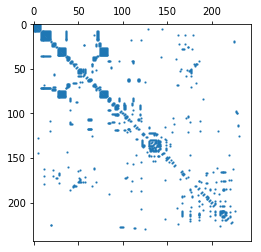

In [7]:
plt.spy(A_inverted, markersize=1)

(array([49., 44., 21., 12., 28., 31., 16.,  7.,  5.,  0., 11.,  1., 17.,
         1.,  0.,  1.]),
 array([ 0.  ,  1.25,  2.5 ,  3.75,  5.  ,  6.25,  7.5 ,  8.75, 10.  ,
        11.25, 12.5 , 13.75, 15.  , 16.25, 17.5 , 18.75, 20.  ]),
 <a list of 16 Patch objects>)

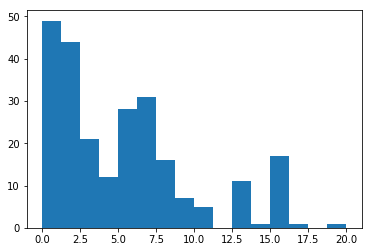

In [8]:
degrees = sum(A_inverted)
plt.hist(degrees, bins=16)

In [9]:
s = 'http://profilesinterror.mindswap.org/document/2005/08/09/16:43:04#_http://counterterror.mindswap.org/2005/terrorists.owl#Mustafa_Kamel'

j = s.split('http://')[1:]

In [10]:
for i in j:
    m, name = i.split('#')
    if len(name) < 2:
        ide = m.split('document')[1]
    else:
        ide = name
    print(ide)


/2005/08/09/16:43:04
Mustafa_Kamel


In [11]:
d = '[aksldfj_akdsjfakf]'

In [12]:
d = d.split(']')[0]
d

'[aksldfj_akdsjfakf'

In [13]:
d = d.replace(']','')

In [14]:
d

'[aksldfj_akdsjfakf'